# Project Milestone 4    

***Karlie Schwartzwald  
DSC 540 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Imported data from API and did cleaning steps 1-5.  
Date of Change:  11/4/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 11/6/2022  

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
# See if we can connect to API
response = requests.get("https://world-happiness-database.herokuapp.com/api/happiness")
print(response.status_code)

200


In [3]:
# Extract Data from the Request using the Json() Method
json = response.json()

In [4]:
json

[{'country': 'Afghanistan',
  'happiness': 2.694,
  'lat': 33.93911,
  'lon': 67.709953,
  'year': '2018'},
 {'country': 'Albania',
  'happiness': 5.004,
  'lat': 41.153332,
  'lon': 20.168331,
  'year': '2018'},
 {'country': 'Algeria',
  'happiness': 5.043,
  'lat': 28.033886,
  'lon': 1.659626,
  'year': '2018'},
 {'country': 'Angola',
  'happiness': 3.795,
  'lat': -11.202692,
  'lon': 17.873887,
  'year': '2014'},
 {'country': 'Argentina',
  'happiness': 5.793,
  'lat': -38.416097,
  'lon': -63.616672,
  'year': '2018'},
 {'country': 'Armenia',
  'happiness': 5.062,
  'lat': 40.069099,
  'lon': 45.038189,
  'year': '2018'},
 {'country': 'Australia',
  'happiness': 7.177,
  'lat': -25.274398,
  'lon': 133.775136,
  'year': '2018'},
 {'country': 'Austria',
  'happiness': 7.396,
  'lat': 47.516231,
  'lon': 14.550072,
  'year': '2018'},
 {'country': 'Azerbaijan',
  'happiness': 5.168,
  'lat': 40.143105,
  'lon': 47.576927,
  'year': '2018'},
 {'country': 'Bahrain',
  'happiness': 6.2

### Step 1: Format Data into a More Readable Format

In [5]:
# Turn json into dataframe
df = pd.DataFrame(json)

In [6]:
df.head()

,country,happiness,lat,lon,year
0,Afghanistan,2.694,33.939110,67.709953,2018
1,Albania,5.004,41.153332,20.168331,2018
2,Algeria,5.043,28.033886,1.659626,2018
3,Angola,3.795,-11.202692,17.873887,2014
4,Argentina,5.793,-38.416097,-63.616672,2018


### Step 2: Drop Unneeded Columns

In [7]:
# Drop columns
df = df[['country', 'happiness']]

### Step 3: Rename Columns

In [8]:
df.columns = ['Country', 'Happiness Score']

### Step 4: Find Outliers and Bad Data

{'whiskers': [<matplotlib.lines.Line2D at 0x20c35579640>,
 'caps': [<matplotlib.lines.Line2D at 0x20c35579ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c355791f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3558d400>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3558d790>],
 'means': []}

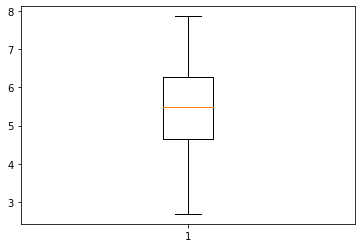

In [9]:
plt.boxplot(df['Happiness Score'])

In [10]:
df['Happiness Score'].isna().sum()

0

It appears as though we have no outliers for the 'Happiness Score' column.

### Step 5: Find Duplicates

In [11]:
df['Country'].duplicated().sum()

0

There are no duplicates in this set.  

***Ethical Implications:***  

I will first drop the columns of lat and lon. Unfortunately, none of my other sources use longitude or langitude, so there is no data to cross reference with these datapoints, making them essentially useless in this analysis. As longitude and latitude is not relevant, I will rely soly on Country names for combining dataframes. I will also remove the year column, as I am going to make the potentially troubling assumption that data within the past decade will be relevant to our analysis and will correspond to nearby years GDP data. I will also need to rename the columns for the sake of unique column names when combining dataframes in the future. There are potential ethical issues as well with what choice of countries we use as some countries have questionable statehood status.

In [12]:
df

,Country,Happiness Score
0,Afghanistan,2.694
1,Albania,5.004
2,Algeria,5.043
3,Angola,3.795
4,Argentina,5.793
...,...,...
150,Venezuela,5.006
151,Vietnam,5.296
152,Yemen,3.058
153,Zambia,4.041
